#**Prodigy infotech** Machine learning Task - 4

##**Statement**: Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

In [1]:
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
leapgestrecog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
from zipfile import ZipFile
with ZipFile('/content/leapgestrecog.zip','r') as zipObj:
  zipObj.extractall('/content/data')

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

###Data Preprocessing

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/data/leapgestrecog/leapGestRecog',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_set = validation_datagen.flow_from_directory(
    '/content/data/leapGestRecog',  # Change this to the correct path for validation data
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 20000 images belonging to 10 classes.
Found 20000 images belonging to 10 classes.


In [5]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#adding 3 more layers with pooling
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#- Flattening
cnn.add(tf.keras.layers.Flatten())
#- Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#- Output Layer
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###Training the CNN

In [6]:
#Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = validation_set, epochs = 5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 192ms/step - accuracy: 0.3699 - loss: 1.7144 - val_accuracy: 0.8960 - val_loss: 0.3039
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.9019 - loss: 0.2934 - val_accuracy: 0.9734 - val_loss: 0.0732
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 181ms/step - accuracy: 0.9497 - loss: 0.1431 - val_accuracy: 0.9680 - val_loss: 0.0800
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 180ms/step - accuracy: 0.9715 - loss: 0.0820 - val_accuracy: 0.9881 - val_loss: 0.0298
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 243ms/step - accuracy: 0.9768 - loss: 0.0611 - val_accuracy: 0.9745 - val_loss: 0.0722


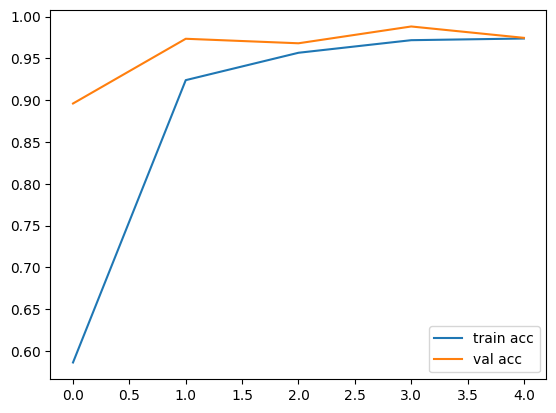

In [7]:
# plot the accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='train acc')

plt.plot(r.history['val_accuracy'], label='val acc')

plt.legend()

plt.show()

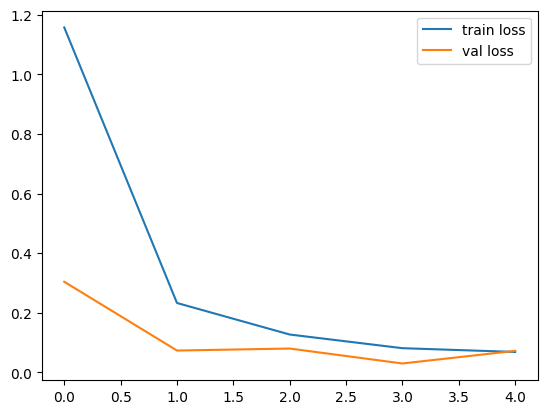

In [10]:
# plot the Loss

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')

plt.plot(r.history['val_loss'], label='val loss')

plt.legend()

plt.show()

In [17]:
import numpy as np
from keras.preprocessing import image

class_labels = ['palm', 'I', 'fist','fist_moved','thumb','index','ok','palm_moved','c','down']
test_image = image.load_img('/content/download.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
predicted_class_index = np.argmax(result, axis=1)[0]


# Get the class name from the class labels
predicted_class_name = class_labels[predicted_class_index]

print(f'Predicted class: {predicted_class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: palm


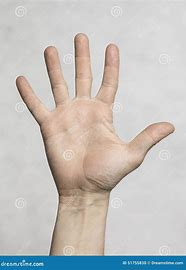

In [18]:
#Prediction 2
#test image visualization
from IPython.display import Image
Image("/content/download.jpg")